# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

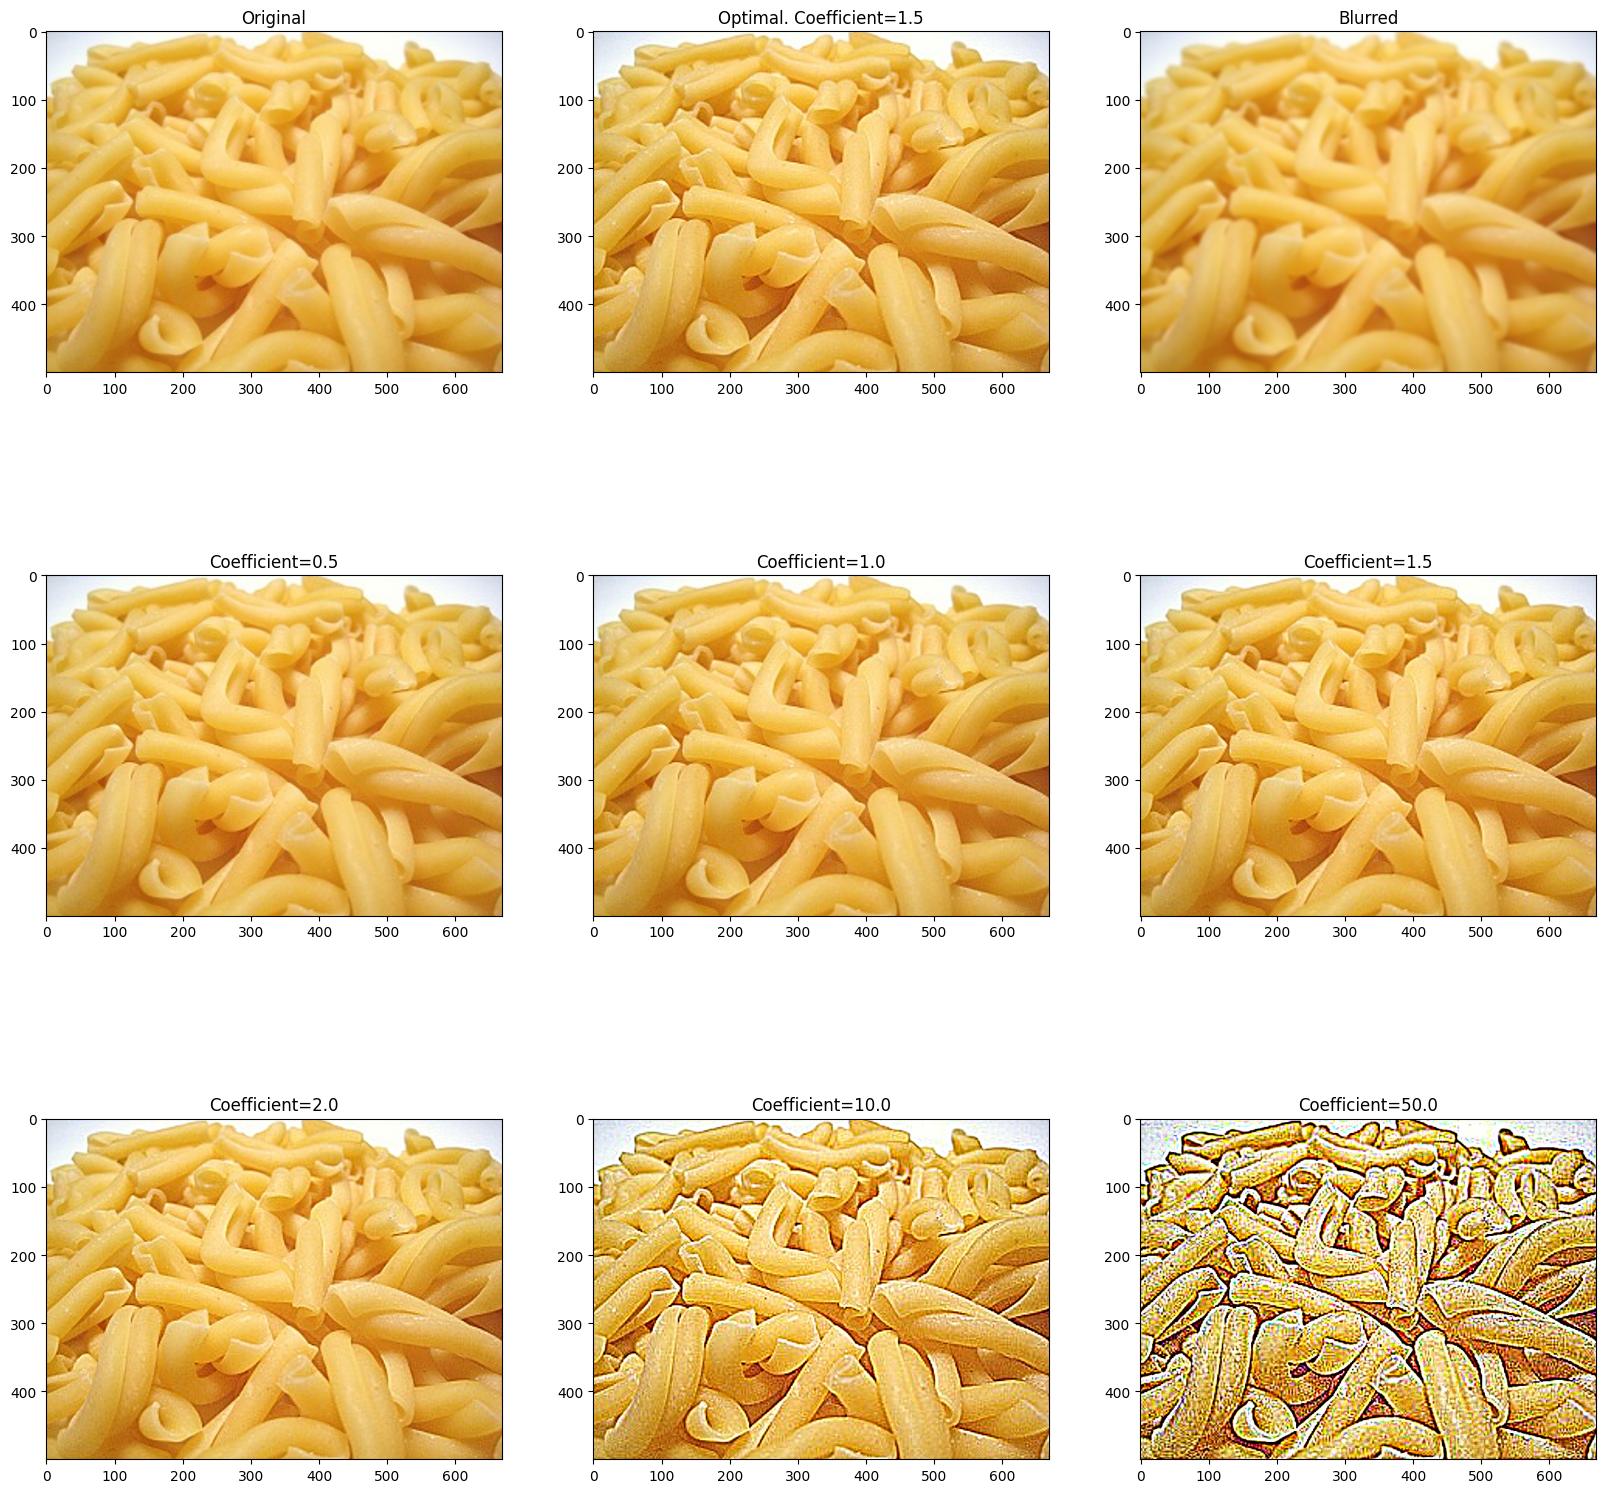

In [2]:
img = cv2.imread('lesson_3_6.png')
# img = cv2.imread('kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
unsharp = cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=5)

# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
img = img / 255
unsharp = unsharp / 255
diff = img  - unsharp


# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened_coeffs = [0.5, 1.0, 1.5, 2.0, 10.0, 50.0]
sharpened_images = []
for coeff in sharpened_coeffs:
    sharpened = img + coeff * diff
    sharpened = np.clip(sharpened, 0.0, 1.0)
    sharpened_images.append({
        'image': sharpened,
        'coeff': coeff
    })

plt.subplot(331), plt.imshow(img), plt.title("Original")
plt.subplot(332), plt.imshow(sharpened_images[2]['image']), plt.title(f"Optimal. Coefficient={sharpened_images[2]['coeff']}")
plt.subplot(333), plt.imshow(unsharp), plt.title("Blurred")


for i, item in enumerate(sharpened_images):
    index = 334 + i 
    plt.subplot(index), plt.imshow(item['image']), plt.title(f"Coefficient={item['coeff']}")


### Questions
###
#### What is a good (reasonable) value for the `amount` parameter?
Оптимальное значение параметра `amount` в Unsharp Masking обычно лежит в диапазоне от 1,0 до 2,0. Этот диапазон часто эффективен для улучшения деталей и придания изображению большей резкости без появления слишком большого количества артефактов.
- `amount = 1` - это минимальное значение, при котором мы начнаем замечать едва заметное повышение резкости.
- `amount = 1,5` - это значение часто идеально подходит для естественной резкости. Оно дает заметный, но не слишком агрессивный эффект резкости, что делает его широко используемым при редактировании изображений.
- `amount = 2` - эффект резкости становится более заметным, особенно для изображений, которым требуется большее улучшение деталей.
###
#### What happens if it is too small?
Если `amount < 1` , то 
1. **Эффект резкости слабый или незаметный**. Маска (разница между исходным и размытым изображением) слишком сильно уменьшена, поэтому общий эффект резкости минимален.
2. **Изображение остается практически неизменным**. Если альфа очень близка к 0, добавление маски не окажет существенного влияния, и вывод будет очень похож на исходное изображение, с небольшими улучшениями краев.
В этом случае мелкие детали могут по-прежнему оставаться размытыми, и изображение может не выглядеть значительно более резким.
###
#### What happens if it is too large?
Для больших значений `amount` можно отметить следующие особенности:
1. **Чрезмерная резкость и артефакты**. Изображение станет чрезмерно резким, и появятся артефакты, такие как:
    - **Эффекты гало**: можно увидеть яркие или темные ореолы вокруг краев изображения, что является распространенным визуальным артефактом при чрезмерной резкости.
    - Сильный контраст вокруг краев может создать **нежелательные контуры** вокруг объектов.
    - **Повышенный шум**. Если на изображении есть шум, его резкость сделает шум более заметным, что приведет к зернистому или пятнистому виду.
2. **Потеря естественности**: чрезмерное повышение резкости может сделать изображение искусственным и неприятным для глаз, особенно в портретной фотографии, где мягкие края часто более желательны.
Например, при очень высоком значении `amount` даже гладкие области на изображении могут стать неестественно текстурированными, и общее визуальное качество может ухудшиться.